# Early Model Testing

In [306]:
%matplotlib inline
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np
import os
import time

### Load dataset

In [307]:
input_file_name = "lotOfFeatures.csv"
input_file_path = os.path.join(os.path.join(os.getcwd(), "data"), input_file_name)

original_data = pd.read_csv(input_file_path, index_col=0, parse_dates=True)
originalSize = original_data.shape[1]
original_data.head()
original_data.shape

(140350, 445)

## Excluding Testing Set

Spliting the dataset into three parts: training, testing and evaluation (last 10 percent).

In [308]:
#start_time = '2012-02-01 00:00:00'
start_time = '2014-02-01 00:00:00'
splitting_point = int(0.9 * original_data.shape[0])
splitting_time = original_data.iloc[[splitting_point]].index.to_pydatetime()[0]
#data = original_data[:splitting_time]
data = original_data[start_time:]

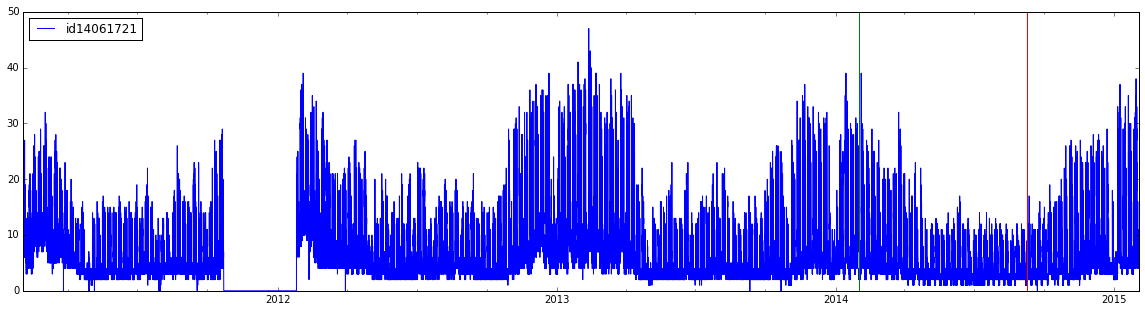

In [309]:
f = original_data[["id14061721"]].plot(figsize=(20,5)) 
original_data.iloc(splitting_point)
f.axvline(start_time, color='g')
f.axvline(splitting_time, color='r')

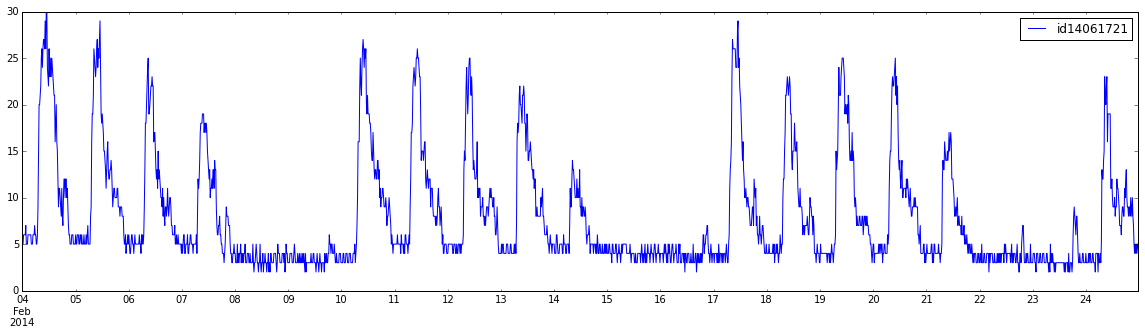

In [310]:
data['2014-02-04':'2014-02-24'][["id14061721"]].plot(figsize=(20,5))  

## Testing Multiindex

Creating test df

In [311]:
df = pd.DataFrame(np.random.randn(6,4),columns=list('ABCD'))
#df.columns = [['ena'] * len(df.columns),df.columns]
#df.columns = [['ena','ena','dva','dva'],df.columns]
#df.columns.set_names(['L1', 'L2'], inplace=True)
df

,A,B,C,D
0,-1.461070,0.140466,-0.093939,-1.255908
1,0.023914,-0.076935,-2.047995,-1.607913
2,1.035184,-0.073631,-1.495529,0.131243
3,1.587811,1.712547,0.101121,0.204470
4,-0.993134,0.332808,-0.327585,-0.525785
5,-0.397308,-0.232840,-1.154609,2.441818


Appanding columns with different level names

In [312]:
df1= df
df2 = df[["A","B"]]
df = pd.concat([df1, df2],axis=1,keys=["ena","dva"],names=["L1","L2"])
df

L1       ena                                     dva          
L2         A         B         C         D         A         B
0  -1.461070  0.140466 -0.093939 -1.255908 -1.461070  0.140466
1   0.023914 -0.076935 -2.047995 -1.607913  0.023914 -0.076935
2   1.035184 -0.073631 -1.495529  0.131243  1.035184 -0.073631
3   1.587811  1.712547  0.101121  0.204470  1.587811  1.712547
4  -0.993134  0.332808 -0.327585 -0.525785 -0.993134  0.332808
5  -0.397308 -0.232840 -1.154609  2.441818 -0.397308 -0.232840

In [313]:
df["ena"][["A"]]

L2,A
0,-1.461070
1,0.023914
2,1.035184
3,1.587811
4,-0.993134
5,-0.397308


In [314]:
df.xs('A',level="L2",axis=1)

L1,ena,dva
0,-1.461070,-1.461070
1,0.023914,0.023914
2,1.035184,1.035184
3,1.587811,1.587811
4,-0.993134,-0.993134
5,-0.397308,-0.397308


## Creating Feature Sets

In [315]:
target_col = 'id14061721'

In [316]:
sensor_cols_to_drop = [col for col in list(data) if col.startswith('id') and not col.startswith(target_col)]
#[col for col in list(data) if col not in sensor_cols_to_drop]
data.drop(sensor_cols_to_drop, axis=1, inplace=True)
list(data)

['id14061721',
 'p',
 't2m_termin',
 'rh_termin',
 'padavine',
 'veter_hitrost',
 'veter_vek_smer',
 'energija_gl',
 'energija_di',
 'HourOfDay',
 'DayOfWeek',
 'Month',
 'Weekday',
 'Weekend',
 'Holiday',
 'DayBeforeHoliday',
 'DayAfterHodliay',
 'BusinessDay',
 'id14061721_roll_mean_1h',
 'id14061721_roll_mean_6h',
 'id14061721_roll_mean_d',
 'id14061721_roll_mean_w',
 'id14061721_roll_mean_m',
 'id14061721_roll_min2_d',
 'id14061721_roll_min2_w',
 'id14061721_roll_max2_d',
 'id14061721_roll_max2_w',
 'id14061721_roll_var_6h',
 'id14061721_roll_var_d',
 'id14061721_roll_var_w',
 'p_roll_mean_1h',
 'p_roll_mean_6h',
 'p_roll_mean_d',
 'p_roll_mean_w',
 'p_roll_mean_m',
 'p_roll_var_1h',
 'p_roll_var_d',
 't2m_termin_roll_mean_1h',
 't2m_termin_roll_mean_6h',
 't2m_termin_roll_mean_d',
 't2m_termin_roll_mean_w',
 't2m_termin_roll_mean_m',
 't2m_termin_roll_min2_d',
 't2m_termin_roll_min2_w',
 't2m_termin_roll_max2_d',
 't2m_termin_roll_max2_w',
 't2m_termin_roll_var_1h',
 't2m_termin_r

In [317]:
prediction_horizon = -10

#data = pd.concat([data, data.shift(prediction_horizon, freq='H')], axis=1, keys=["original","shifted"],names=["L1","L2"])

columnsToShift = list(data)
shiftedColumns = ["shifted_" + col for col in columnsToShift]

data[shiftedColumns] = data[columnsToShift].shift(prediction_horizon, freq='H')

data.dropna(inplace=True)
print data.shape
data.head()

(35096, 136)


,id14061721,p,t2m_termin,rh_termin,padavine,veter_hitrost,veter_vek_smer,energija_gl,energija_di,HourOfDay,...,shifted_rh_termin_roll_var_d,shifted_energija_gl_roll_mean_1h,shifted_energija_gl_roll_mean_6h,shifted_energija_gl_roll_mean_d,shifted_energija_gl_roll_mean_w,shifted_energija_gl_roll_mean_m,shifted_energija_gl_roll_var_1h,shifted_energija_gl_roll_var_d,shifted_BusinessDay_sum,shifted_Holiday_sum
2014-02-01 00:00:00,3,1008,9.20,84.0,0.2,2.80,89,0,0,0,...,39.181701,32.2,8.24,9.613402,43.023031,28.751260,142.825,328.674506,480,0
2014-02-01 00:15:00,3,1008,9.35,83.0,0.1,3.00,94,0,0,0,...,38.252631,37.0,9.92,9.644330,42.706538,28.738831,87.625,330.603952,480,0
2014-02-01 00:30:00,4,1008,9.50,82.0,0.0,3.20,99,0,0,0,...,36.981100,42.3,12.32,9.757732,42.375186,28.728586,181.700,340.870382,480,0
2014-02-01 00:45:00,3,1008,9.60,81.5,0.1,3.35,102,0,0,0,...,35.570984,43.8,14.58,9.731959,41.997028,28.713302,218.075,338.370114,480,0
2014-02-01 01:00:00,3,1008,9.70,81.0,0.2,3.50,105,0,0,1,...,34.143471,47.1,16.70,9.592784,41.578752,28.698858,212.300,324.282968,480,0


In [318]:
measurements_cols = [col for col in list(data) if col.startswith(target_col)]

wetaher_current_cols =  ['p', 't2m_termin', 'rh_termin', 'padavine', 'veter_hitrost', 'veter_vek_smer', 'energija_gl',
 'energija_di', 'p_roll_mean_1h', 'p_roll_mean_6h', 'p_roll_mean_d', 'p_roll_mean_w', 'p_roll_mean_m', 'p_roll_var_1h',
 'p_roll_var_d', 't2m_termin_roll_mean_1h', 't2m_termin_roll_mean_6h', 't2m_termin_roll_mean_d', 't2m_termin_roll_mean_w',
 't2m_termin_roll_mean_m', 't2m_termin_roll_min2_d', 't2m_termin_roll_min2_w', 't2m_termin_roll_max2_d',
 't2m_termin_roll_max2_w', 't2m_termin_roll_var_1h', 't2m_termin_roll_var_d', 'rh_termin_roll_mean_1h',
 'rh_termin_roll_mean_6h', 'rh_termin_roll_mean_d', 'rh_termin_roll_mean_w', 'rh_termin_roll_mean_m',
 'rh_termin_roll_min2_d', 'rh_termin_roll_min2_w', 'rh_termin_roll_max2_d', 'rh_termin_roll_max2_w',
 'rh_termin_roll_var_1h', 'rh_termin_roll_var_d', 'energija_gl_roll_mean_1h', 'energija_gl_roll_mean_6h',
 'energija_gl_roll_mean_d', 'energija_gl_roll_mean_w', 'energija_gl_roll_mean_m', 'energija_gl_roll_var_1h',
 'energija_gl_roll_var_d']

weather_forecasted_cols =  ['shifted_p', 'shifted_t2m_termin', 'shifted_rh_termin', 'shifted_padavine', 
                            'shifted_veter_hitrost', 'shifted_veter_vek_smer', 'shifted_energija_gl']

date_time_cols =  ['shifted_HourOfDay', 'shifted_DayOfWeek', 'shifted_Month', 'shifted_Weekday', 'shifted_Weekend', 
                   'shifted_Holiday', 'shifted_DayBeforeHoliday', 'shifted_DayAfterHodliay', 'shifted_BusinessDay', 
                   'shifted_BusinessDay_sum', 'shifted_Holiday_sum']

In [319]:
all_cols = measurements_cols + wetaher_current_cols + weather_forecasted_cols + date_time_cols 
m_wc_wf_cols = measurements_cols + wetaher_current_cols + weather_forecasted_cols
m_wc_dt_cols = measurements_cols + wetaher_current_cols + date_time_cols 
m_wf_dt_cols = measurements_cols + weather_forecasted_cols + date_time_cols 
m_dt_cols = measurements_cols + date_time_cols 
m_cols = measurements_cols

## Define Machine Learning Models and Data Sets

In [320]:
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import svm
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.learning_curve import learning_curve
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import explained_variance_score

In [321]:
training_data = data[:splitting_time]
testing_data = data[splitting_time:] # chunk of original data, reserved for testing purpuses

print "Original Dataset: " + original_data.index.summary()
print "Training Dataset: " + training_data.index.summary()
print "Testing Dataset: " + testing_data.index.summary()

Original Dataset: DatetimeIndex: 140350 entries, 2011-02-01 00:30:00 to 2015-02-01 23:45:00
Training Dataset: DatetimeIndex: 21102 entries, 2014-02-01 00:00:00 to 2014-09-08 19:15:00
Testing Dataset: DatetimeIndex: 13995 entries, 2014-09-08 19:15:00 to 2015-02-01 13:45:00


In [322]:
models = [{'name': "Ridge Regression", 'init': "linear_model.Ridge()"},
          {'name': "K Nearest Neighbors", 'init': "neighbors.KNeighborsRegressor(n_neighbors = 5)"},
          {'name': "Random Forest", 'init': "RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, n_jobs=7)"},
          #{'name': "SVR", 'init': "svm.SVR(kernel ='rbf', C = 10, gamma = .001)"},
          #{'name': "Neural Network", 'init': "PyBrainNN(hidden_size = 100, learningrate = 0.001, momentum = 0.1, maxEpochs=10)"}
          ]

data_sets = [{'name': "all_cols", 'train': training_data[all_cols], 'test': testing_data[all_cols]},
             #{'name': "m_wc_wf_cols", 'train': training_data[m_wc_wf_cols], 'test': testing_data[m_wc_wf_cols]},
             {'name': "m_wc_dt_cols", 'train': training_data[m_wc_dt_cols], 'test': testing_data[m_wc_dt_cols]},
             {'name': "m_wf_dt_cols", 'train': training_data[m_wf_dt_cols], 'test': testing_data[m_wf_dt_cols]},
             {'name': "m_dt_cols", 'train': training_data[m_dt_cols], 'test': testing_data[m_dt_cols]},
             #{'name': "m_cols", 'train': training_data[m_cols], 'test': testing_data[m_cols]},
             ]

error_metrics = [{'name': "R2"}
                 {'name': "MAE"}
                ]

target = {'name': target_col, 'train': training_data[["shifted_" + target_col]], 'test': testing_data[["shifted_" + target_col]]}

#results_df = pd.DataFrame(index=pd.MultiIndex.from_arrays([[],[],[]], names=['dataset', 'subset','idx']))

It is clearlly seen that weather features are very important. Prediction of energy radiation is the second most imporantant feature, right after the business day.

## Prediction Results

In [348]:
validation_df = pd.DataFrame(columns=pd.MultiIndex.from_arrays([[],[]], names=['model', 'error_metric']))
validation_df.loc[1, ("ena","dva")] = 2
validation_df.loc[1, ("ena","tri")] = 2
validation_df

model        ena    
error_metric dva tri
1              2   2

In [358]:
for id in range (1,3):
    print id

1
2


In [351]:
#validation_df = pd.DataFrame(index=pd.MultiIndex.from_arrays([[],[]], names=['model', 'error_metric']))
validation_df = pd.DataFrame(columns=pd.MultiIndex.from_arrays([[],[]], names=['model', 'error_metric']))
"""
f, axx = plt.subplots(len(models), len(data_sets), sharey=True, sharex=True)
f.set_size_inches(6*len(data_sets),4*len(models))
#plt.suptitle('Learning curve', fontsize=15)
"""

model = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, n_jobs=7)

horizon = 1

for idy, data_set in enumerate(data_sets):

    X_train = data_set['train'].values
    y_train = target['train'].values.ravel()

    X_test = data_set['test'].values
    y_test = target['test'].values.ravel()

    start = time.time() # Start measuring time
    model.fit(X_train,y_train)
    runtime = time.time() - start # Calculate runtime

    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test) 

    #validation_df.loc[(data_set['name'], "R2"), horizon] = train_score
    #validation_df.loc[(data_set['name'], "R2"), horizon] = test_score
    validation_df.loc[horizon, (data_set['name'], "R2")] = test_score
    
        
    print("-->Feature set: {0}, train score: {1:.3f}, test score: {2:.3f}, runtime: {3:.2f}s".format(
        data_set['name'], train_score, test_score, runtime)) 
    
    """"
    testing_data['Prediction'] = model.predict(X_test) 
    ax = testing_data['2015-01-06 03:00:00':'2015-01-13 01:00:00'][[target_cols,'Prediction']].plot(ax = axx[idx,idy], 
        title = (data_set['name'] + " (score: %0.2f)" % test_score), style=['b:','g-'], legend=False)
    ax.set_ylabel(mdl['name'])
    #ax.set_xlabel(data_set['name'])

    """

"""
#plt.legend(loc='upper center', bbox_to_anchor=(-0.7, 2.5), ncol=4, fancybox=True, shadow=True)
#plt.figlegend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4, fancybox=True, shadow=True)
#plt.legend().get_texts()[1].set_text('Baseline')
#plt.tight_layout()
plt.show()
"""

-->Feature set: all_cols, train score: 0.962, test score: 0.733, runtime: 13.98s
-->Feature set: m_wc_dt_cols, train score: 0.960, test score: 0.710, runtime: 12.37s
-->Feature set: m_wf_dt_cols, train score: 0.953, test score: 0.763, runtime: 4.26s
-->Feature set: m_dt_cols, train score: 0.948, test score: 0.708, runtime: 2.56s


"\n#plt.legend(loc='upper center', bbox_to_anchor=(-0.7, 2.5), ncol=4, fancybox=True, shadow=True)\n#plt.figlegend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4, fancybox=True, shadow=True)\n#plt.legend().get_texts()[1].set_text('Baseline')\n#plt.tight_layout()\nplt.show()\n"

In [352]:
validation_df

model,all_cols,m_wc_dt_cols,m_wf_dt_cols,m_dt_cols
error_metric,R2,R2,R2,R2
1,0.733119,0.709588,0.763347,0.707853


In [325]:
validation_df

,,1
model,error_metric,
all_cols,R2,0.739134
m_wc_dt_cols,R2,0.717364
m_wf_dt_cols,R2,0.764359
m_dt_cols,R2,0.718514


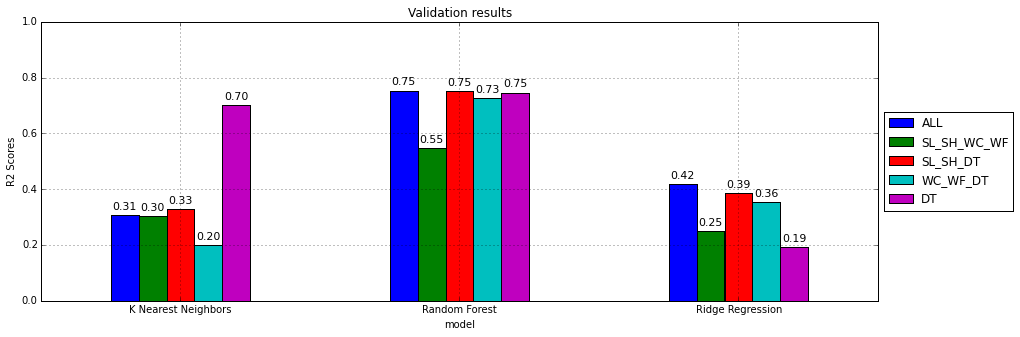

In [38]:
mean_df = validation_df.groupby(level=('model', 'subset')).mean()
mean_df = mean_df.xs('test', level='subset') # Include only test data

std_df = validation_df.groupby(level=('model', 'subset')).std()
std_df = std_df.xs('test', level='subset') # Include only test data

ax = mean_df.plot(yerr=std_df, kind='bar', rot=0, ylim=(0,1), figsize=(15, 5))

for p in ax.patches:
    ax.annotate(str("%.2f" % p.get_height()), (p.get_x()+p.get_width()/2., p.get_height() + 0.02), fontsize=11, ha='center')
    
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('R2 Scores')
plt.title('Validation results')

plt.show()

NOTE: From this, it looks like weather does not help to improve accuracy. Date time features are the most important.

## Feature Importance

-->Feature set: ALL
-->Feature set: SL_SH_WC_WF
-->Feature set: SL_SH_DT
-->Feature set: WC_WF_DT
-->Feature set: DT


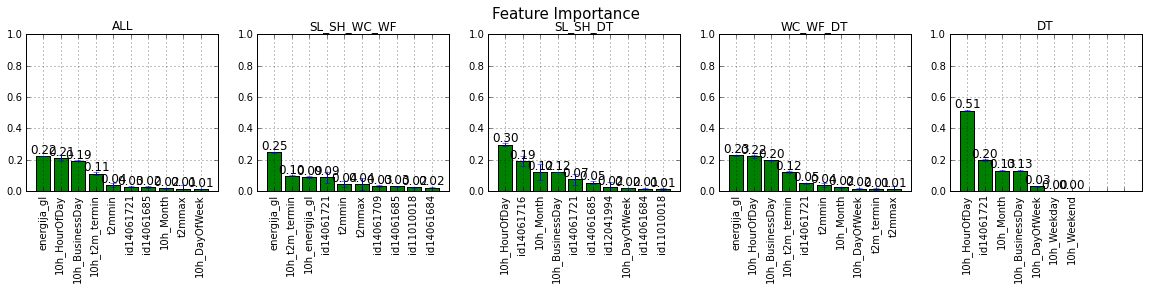

In [35]:
num_of_top_important_ftrs = 10;

fig, axes = plt.subplots(1, len(data_sets))
fig.set_size_inches(20,3)
plt.suptitle('Feature Importance', fontsize=15)
plt.subplots_adjust(top=.85)
plt.setp(axes, xticks=xrange(num_of_top_important_ftrs), xlim = [-1, num_of_top_important_ftrs], ylim=[0, 1])

model = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, n_jobs=7)

for idx, data_set in enumerate(data_sets):
    print "-->Feature set:", data_set['name']
    X = data_set['train'].values
    y = target['train'].values.ravel()
    model.fit(X, y)
    
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
    indices = np.argsort(importances)[::-1][:num_of_top_important_ftrs]
    ftr_size = num_of_top_important_ftrs if data_set['train'].shape[1] > num_of_top_important_ftrs else data_set['train'].shape[1] 
    
    for f in range(ftr_size):
        axes[idx].annotate( str("%.2f" % importances[indices[f]]), (f, importances[indices[f]] + 0.02), fontsize=12, ha='center')
    
    # Plot the feature importances of the forest
    axes[idx].set_title(data_set['name'])
    axes[idx].bar(xrange(ftr_size), importances[indices], color="g", yerr=std[indices], align="center")
    axes[idx].set_xticklabels(data_set['train'].columns[indices], rotation='vertical')
    axes[idx].grid(True)

#fig.tight_layout()
plt.show()